# Part 3 Task 1
https://github.com/josStorer/RWKV-Runner/blob/master/README_ZH.md

# 正式开始构建这个Pipeline

## Clone Git

In [1]:
!git clone https://github.com/josStorer/RWKV-Runner.git

Cloning into 'RWKV-Runner'...
remote: Enumerating objects: 8117, done.
remote: Counting objects: 100% (2329/2329), done.
remote: Compressing objects: 100% (663/663), done.
remote: Total 8117 (delta 1802), reused 1671 (delta 1666), pack-reused 5788 (from 2)
Receiving objects: 100% (8117/8117), 82.49 MiB | 16.02 MiB/s, done.
Resolving deltas: 100% (5634/5634), done.


In [2]:
# Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 初始化环境

In [3]:
# 重设python环境（请选择1）
!update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!update-alternatives --config python3

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.12   2         auto mode
  1            /usr/bin/python3.10   1         manual mode
  2            /usr/bin/python3.12   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 1
update-alternatives: using /usr/bin/python3.10 to provide /usr/bin/python3 (python3) in manual mode


In [4]:
# 重新安装pip
!curl -sS https://bootstrap.pypa.io/get-pip.py | python3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 67.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pip]


In [5]:
!/usr/bin/python3.10 -m pip install -r RWKV-Runner/backend-python/requirements.txt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 894.6/894.6 kB 41.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 86.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 163.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 94.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 103.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 97.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 115.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 107.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 161.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 100.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
!/usr/bin/python3.10 -m pip install ninja

In [7]:
!pip install -q huggingface_hub

## 设置路径

In [9]:
import os
# TODO: Set Your Own Dir toward the "DSGA1011 NLP Final Project"
base_dir = os.path.join('/content/drive', 'MyDrive', 'DSGA1011 NLP Final Project')
base_dir

'/content/drive/MyDrive/DSGA1011 NLP Final Project'

In [10]:
os.path.exists(base_dir)

True

In [11]:
# the working dir
working_dir = os.path.join(base_dir, 'RWKV Dataset Test')

# Check whether the file exist, if not, raise error
if not os.path.exists(working_dir):
  raise Exception('The working dir does not exist')
else:
  # Print the file under it
  sub_files = os.listdir(working_dir)
  # add /n to subfiles
  sub_files = "\n".join(sub_files)
  file_info = f"The existing files under {working_dir} are: \n{sub_files}"
  print(file_info)

The existing files under /content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV Dataset Test are: 
Tryrunner_for_RACE.ipynb
Tryrunner_for_Quality.ipynb
outputs
outputs_race
quality_data


In [14]:
import os
import shutil

# move dataset file to /content/
data_set_path = os.path.join(working_dir, 'quality_data')
data_train = os.path.join(data_set_path, 'QuALITY.v1.0.1.htmlstripped.train')
data_test = os.path.join(data_set_path, 'QuALITY.v1.0.1.htmlstripped.dev')

if not os.path.exists(data_train):
    raise Exception('The data_train does not exist')
if not os.path.exists(data_test):
    raise Exception('The data_test does not exist')

# Create target directory (equivalent to: %mkdir /content/data)
target_dir = '/content/data'
os.makedirs(target_dir, exist_ok=True)

# Copy files (roughly equivalent to: rsync -r ...)
# shutil.copy2 preserves metadata; use copy if you do not need it
shutil.copy2(data_train, target_dir)
shutil.copy2(data_test, target_dir)


'/content/data/QuALITY.v1.0.1.htmlstripped.dev'

## 模型下载

In [15]:
import os
import shutil
from huggingface_hub import hf_hub_download

# ===========================================================
# 1. 统一配置：模型展示名称 → { filename, repo_id }
#    统一下载到 /content/models
# ===========================================================

MODEL_BASE_DIR = "/content/models"

MODEL_SOURCES = {
    # --- World series ---
    "World 0.1B": {
        "filename": "RWKV-x070-World-0.1B-v2.8-20241210-ctx4096.pth",
        "repo_id": "BlinkDL/rwkv-7-world",
    },
    "World 0.4B": {
        "filename": "RWKV-x070-World-0.4B-v2.9-20250107-ctx4096.pth",
        "repo_id": "BlinkDL/rwkv-7-world",
    },
    "World 1.5B": {
        "filename": "RWKV-x070-World-1.5B-v3-20250127-ctx4096.pth",
        "repo_id": "BlinkDL/rwkv-7-world",
    },
    "World 2.9B": {
        "filename": "RWKV-x070-World-2.9B-v3-20250211-ctx4096.pth",
        "repo_id": "BlinkDL/rwkv-7-world",
    },

    # --- Pile series ---
    "Pile 1.47B": {
        "filename": "RWKV-x070-Pile-1.47B-20241210-ctx4096.pth",
        "repo_id": "BlinkDL/rwkv-7-pile",
    },
    "Pile 421M": {
        "filename": "RWKV-x070-Pile-421M-20241127-ctx4096.pth",
        "repo_id": "BlinkDL/rwkv-7-pile",
    },
    "Pile 168M": {
        "filename": "RWKV-x070-Pile-168M-20241120-ctx4096.pth",
        "repo_id": "BlinkDL/rwkv-7-pile",
    },
    "Pile 165M L25-D576": {
        "filename": "RWKV-x070-Pile-165M-L25-D576-20241218-ctx4096.pth",
        "repo_id": "BlinkDL/rwkv-7-pile",
    },
    "Pile 164M L33-D512": {
        "filename": "RWKV-x070-Pile-164M-L33-D512-20241218-ctx4096.pth",
        "repo_id": "BlinkDL/rwkv-7-pile",
    },

    # --- g1 series（注意 repo_id 和 2.9B 的日期） ---
    "g1 0.1B": {
        "filename": "rwkv7-g1-0.1b-20250307-ctx4096.pth",
        "repo_id": "BlinkDL/rwkv7-g1",
    },
    "g1 0.4B": {
        "filename": "rwkv7-g1-0.4b-20250324-ctx4096.pth",
        "repo_id": "BlinkDL/rwkv7-g1",
    },
    "g1 1.5B": {
        "filename": "rwkv7-g1-1.5b-20250429-ctx4096.pth",
        "repo_id": "BlinkDL/rwkv7-g1",
    },
    "g1 2.9B": {
        "filename": "rwkv7-g1-2.9b-20250519-ctx4096.pth",  # ← 这里用 19
        "repo_id": "BlinkDL/rwkv7-g1",
    },
}


# ===========================================================
# 2. 用 hf_hub_download 下载单个模型
# ===========================================================

def download_model(repo_id: str, filename: str, local_path: str) -> bool:
    """
    Download a model file via hf_hub_download, then copy
    from HF 缓存到 local_path（/content/models/...）。

    Return True if success, False otherwise.
    """
    try:
        os.makedirs(os.path.dirname(local_path), exist_ok=True)

        print(f"[INFO] Downloading {filename} from {repo_id} via hf_hub_download ...")
        # 这一步会：
        # - 处理权限 / token
        # - 自动断点续传
        # - 用自己的 tqdm 显示下载进度
        downloaded_path = hf_hub_download(
            repo_id=repo_id,
            filename=filename,
            repo_type="model",
        )

        # 如果缓存路径和目标路径不同，就拷贝一份
        if downloaded_path != local_path:
            shutil.copy2(downloaded_path, local_path)

        print(f"[OK] Saved to {local_path}\n")
        return True

    except Exception as e:
        print(f"[ERROR] Failed to download {filename} from {repo_id}: {e}\n")
        # 出错时尽量删掉半截文件
        try:
            if os.path.exists(local_path):
                os.remove(local_path)
        except Exception:
            pass
        return False


# ===========================================================
# 3. 主入口：根据 selected_models 构建最终 model_dict
# ===========================================================

def prepare_model_dict(selected_models, base_dir: str = MODEL_BASE_DIR):
    """
    Build a model_dict for selected models using hf_hub_download.

    规则：
    1. 只处理 selected_models 里指定的模型；
    2. 如果 /content/models 下已有对应文件，直接复用；
    3. 如果本地没有，就用 hf_hub_download 下载；
    4. 下载失败则跳过，并且不写入字典。
    """
    os.makedirs(base_dir, exist_ok=True)
    model_dict = {}

    for name in selected_models:
        if name not in MODEL_SOURCES:
            print(f"[WARN] Unknown model name: {name}, skipped.")
            continue

        info = MODEL_SOURCES[name]
        filename = info["filename"]
        repo_id = info["repo_id"]
        local_path = os.path.join(base_dir, filename)

        # 1) 已经下载过？
        if os.path.exists(local_path):
            print(f"[OK] Found local model: {name} -> {local_path}")
            model_dict[name] = local_path
            continue

        # 2) 没有就下载
        ok = download_model(repo_id, filename, local_path)

        # 3) 下载成功才写入字典
        if ok and os.path.exists(local_path):
            model_dict[name] = local_path
        else:
            print(f"[ERROR] {name} download failed, not added to model_dict.\n")

    return model_dict

In [16]:
# # ===== 只选 World和g1 系列 =====

selected_models = [
    name for name in MODEL_SOURCES.keys()
    if name.startswith("World ") or name.startswith("g1 ")
]

model_dict = prepare_model_dict(selected_models)

print("Final model_dict:", model_dict)

[INFO] Downloading RWKV-x070-World-0.1B-v2.8-20241210-ctx4096.pth from BlinkDL/rwkv-7-world via hf_hub_download ...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


RWKV-x070-World-0.1B-v2.8-20241210-ctx40(…):   0%|          | 0.00/382M [00:00<?, ?B/s]

[OK] Saved to /content/models/RWKV-x070-World-0.1B-v2.8-20241210-ctx4096.pth

[INFO] Downloading RWKV-x070-World-0.4B-v2.9-20250107-ctx4096.pth from BlinkDL/rwkv-7-world via hf_hub_download ...


RWKV-x070-World-0.4B-v2.9-20250107-ctx40(…):   0%|          | 0.00/902M [00:00<?, ?B/s]

[OK] Saved to /content/models/RWKV-x070-World-0.4B-v2.9-20250107-ctx4096.pth

[INFO] Downloading RWKV-x070-World-1.5B-v3-20250127-ctx4096.pth from BlinkDL/rwkv-7-world via hf_hub_download ...


RWKV-x070-World-1.5B-v3-20250127-ctx4096(…):   0%|          | 0.00/3.06G [00:00<?, ?B/s]

[OK] Saved to /content/models/RWKV-x070-World-1.5B-v3-20250127-ctx4096.pth

[INFO] Downloading RWKV-x070-World-2.9B-v3-20250211-ctx4096.pth from BlinkDL/rwkv-7-world via hf_hub_download ...


RWKV-x070-World-2.9B-v3-20250211-ctx4096(…):   0%|          | 0.00/5.90G [00:00<?, ?B/s]

[OK] Saved to /content/models/RWKV-x070-World-2.9B-v3-20250211-ctx4096.pth

[INFO] Downloading rwkv7-g1-0.1b-20250307-ctx4096.pth from BlinkDL/rwkv7-g1 via hf_hub_download ...


rwkv7-g1-0.1b-20250307-ctx4096.pth:   0%|          | 0.00/382M [00:00<?, ?B/s]

[OK] Saved to /content/models/rwkv7-g1-0.1b-20250307-ctx4096.pth

[INFO] Downloading rwkv7-g1-0.4b-20250324-ctx4096.pth from BlinkDL/rwkv7-g1 via hf_hub_download ...


rwkv7-g1-0.4b-20250324-ctx4096.pth:   0%|          | 0.00/902M [00:00<?, ?B/s]

[OK] Saved to /content/models/rwkv7-g1-0.4b-20250324-ctx4096.pth

[INFO] Downloading rwkv7-g1-1.5b-20250429-ctx4096.pth from BlinkDL/rwkv7-g1 via hf_hub_download ...


rwkv7-g1-1.5b-20250429-ctx4096.pth:   0%|          | 0.00/3.06G [00:00<?, ?B/s]

[OK] Saved to /content/models/rwkv7-g1-1.5b-20250429-ctx4096.pth

[INFO] Downloading rwkv7-g1-2.9b-20250519-ctx4096.pth from BlinkDL/rwkv7-g1 via hf_hub_download ...


rwkv7-g1-2.9b-20250519-ctx4096.pth:   0%|          | 0.00/5.90G [00:00<?, ?B/s]

[OK] Saved to /content/models/rwkv7-g1-2.9b-20250519-ctx4096.pth

Final model_dict: {'World 0.1B': '/content/models/RWKV-x070-World-0.1B-v2.8-20241210-ctx4096.pth', 'World 0.4B': '/content/models/RWKV-x070-World-0.4B-v2.9-20250107-ctx4096.pth', 'World 1.5B': '/content/models/RWKV-x070-World-1.5B-v3-20250127-ctx4096.pth', 'World 2.9B': '/content/models/RWKV-x070-World-2.9B-v3-20250211-ctx4096.pth', 'g1 0.1B': '/content/models/rwkv7-g1-0.1b-20250307-ctx4096.pth', 'g1 0.4B': '/content/models/rwkv7-g1-0.4b-20250324-ctx4096.pth', 'g1 1.5B': '/content/models/rwkv7-g1-1.5b-20250429-ctx4096.pth', 'g1 2.9B': '/content/models/rwkv7-g1-2.9b-20250519-ctx4096.pth'}


## 启动服务器

In [54]:
# Star url
!fuser -k 8000/tcp || true
!/usr/bin/python3.10 RWKV-Runner/backend-python/main.py --host 0.0.0.0 --port 8000 > server.log 2>&1 &
# !/usr/bin/python3.10 RWKV-Runner/backend-python/main.py --host 0.0.0.0 --port 8000 2>&1 | tee server.log

In [18]:
# API doc
from google.colab import output
docs_url = output.eval_js("google.colab.kernel.proxyPort(8000)") + "/docs"
print("Docs URL:", docs_url)


Docs URL: https://8000-gpu-t4-hm-203cw3x9kx5y0-a.asia-southeast1-2.prod.colab.dev/docs


In [19]:
# # Enable cache
import requests
!/usr/bin/python3.10 -m pip install cyac==1.9
cache_enable_resp = requests.post("http://127.0.0.1:8000/enable-state-cache")
print(cache_enable_resp.status_code, cache_enable_resp.text)
# 200 "success"

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for cyac: filename=cyac-1.9-cp310-cp310-linux_x86_64.whl size=1038224 sha256=7e7dfe0e31d8e3eccf33f77c495746e36184a7539a842c251a37bb7d0ff7586a
  Stored in directory: /root/.cache/pip/wheels/40/ae/45/9076427b28cf92fb626c2246994afd3aacec5e0c0ce060de1a
Successfully built cyac
200 "success"


In [20]:
# Import
import requests
import json
import time
import re
from tqdm.auto import tqdm

## Basic Functions for model

In [47]:
def bulid_chat_body(
  content_list: list,
  model="rwkv",
  max_tokens=128,
  temperature=0.3
    ):

  chat_body = {
    "model": model,
    "messages": [
      {
        "role": "user",
        "content":"\n\n".join(content_list),
        "raw": False
      }
    ],
    "stream": False,
    "max_tokens": max_tokens,
    "temperature": temperature
  }
  return chat_body

def parse_choice_letter(text: str):
  """
  Parse the model output and return one of {'A','B','C','D'} if found,
  otherwise return None.

  策略：
  1. 按行拆分，找每一行第一个非空字符是不是 A/B/C/D。
  2. 如果没有，再在整段文本里用正则找独立出现的 A/B/C/D。
  """
  if not text:
      return None

  # 1) 逐行检查：第一非空字符如果是 A/B/C/D 就直接用它
  lines = [ln.strip() for ln in text.splitlines() if ln.strip()]
  for ln in lines:
      # 例如 "A", "A: 10 hours", "B) xxx"
      m = re.match(r'^([ABCD])\b', ln, flags=re.IGNORECASE)
      if m:
          return m.group(1).upper()

  # 2) 全文里找独立出现的 A/B/C/D（比如 "answer is B."）
  m = re.search(r'\b([ABCD])\b', text, flags=re.IGNORECASE)
  if m:
      return m.group(1).upper()

  return None

def switch_model(version="World 0.1B"):
  model_path = model_dict[version]

  swich_body = {
    "model": model_path,
    "strategy": "cuda fp16",
    "tokenizer": "",
    "customCuda": True,
    "deploy": False
  }

  r = requests.post("http://127.0.0.1:8000/switch-model", json=swich_body)
  if r.status_code != 200:
    print(f"[switch_model] Warning: failed to switch model: {r.text}")
  else:
    print(f"Success: switched to {version}")
    # print(json.dumps(r.json(), indent=2))
  # 200 "success"

# Quality Dataset


## 加载和分析Quality数据集

In [24]:
# ---------- QuALITY dataset paths ----------
train_QuALITY_path = os.path.join("data", "QuALITY.v1.0.1.htmlstripped.train")
dev_QuALITY_path   = os.path.join("data", "QuALITY.v1.0.1.htmlstripped.dev")

# ---------- basic jsonl helpers (from Tryrunner_hidden) ----------
def jsonl_iter(path):
    """Yield JSON objects line by line from a .jsonl file."""
    with open(path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f, 1):
            line = line.strip()
            if not line:
                continue
            try:
                yield json.loads(line)
            except Exception as e:
                print(f"[WARN] line {i} parse error: {e}")

def count_lines(path):
    """Count lines in a .jsonl file."""
    with open(path, "r", encoding="utf-8") as f:
        return sum(1 for _ in f)

In [25]:
QuALITY_iter = jsonl_iter(dev_QuALITY_path)
first = next(QuALITY_iter)
print(type(first), list(first.keys()))
print("Num dev examples:", count_lines(dev_QuALITY_path))

<class 'dict'> ['article_id', 'set_unique_id', 'batch_num', 'writer_id', 'source', 'title', 'year', 'author', 'topic', 'article', 'questions', 'url', 'license']
Num dev examples: 230


## Race数据集辅助函数

In [38]:
def get_question(record, index: int):
    """Get the index-th question object from a QuALITY record."""
    max_question_index = len(record["questions"]) - 1
    if index < 0 or index > max_question_index:
        raise ValueError(f"index {index} out of range [0, {max_question_index}]")
    return record["questions"][index]

def get_question_str(question: dict) -> str:
    """Build 'Question + Options' string from a QuALITY question object."""
    opts = question["options"]
    return "\n".join([
        "Question:",
        question["question"],
        "Options:",
        f"A: {opts[0]}",
        f"B: {opts[1]}",
        f"C: {opts[2]}",
        f"D: {opts[3]}",
    ])

def get_gold(q_obj: dict) -> str:
    """
    QuALITY v1.0.1:
    - q_obj['gold_label'] 是一个 0~3 的整数索引
    - 我们需要把它映射成 'A'/'B'/'C'/'D'
    """
    idx = q_obj["gold_label"]   # 这里假设你的数据里就是这个字段
    return "ABCD"[idx-1]



In [39]:
q0 = get_question(first, 2)
print(q0.keys())
print("--- Question block ---")
print(get_question_str(q0))
print("Gold:", get_gold(q0))

dict_keys(['question', 'question_unique_id', 'options', 'writer_label', 'gold_label', 'validation', 'speed_validation', 'difficult'])
--- Question block ---
Question:
Why does shame flame in Blake's cheeks when Deirdre goes to prepare Eldoria's dias?
Options:
A: He is embarrassed at the thought that Deirdre might enter the room while he is sleeping with Eldoria. 
B: He feels that prostitution is morally reprehensible. 
C: He feels guilty about sleeping with Eldoria when there's a child in the hut, Deirdre, who knows exactly what's going on. 
D: He feels guilty about wishing Deirdre was older so he could sleep with her instead. 
Gold: C


## 单个问题测试（跑通了再走下一步）

In [52]:
import json
import requests

# 1) 选模型
test_model = list(model_dict.keys())[1]
print("Using model:", test_model)
switch_model(test_model)

# 2) 角色设定 + 规则（后面会再重复一遍）
charater_setting = (
    "You are a careful reasoner. "
    "You will read one long passage and answer a multiple-choice question about it.\n"
)

rule_setting = (
    "There are exactly four options: A, B, C, and D.\n"
    "When you answer, you MUST output ONLY one letter from {A,B,C,D}.\n"
    "Output ONLY the letter on the first line, with nothing else.\n"
)

# 3) 从 dev 里找一篇至少有 2 道题的文章（Q0 做示例，Q1 做真实题）
dev_iter = jsonl_iter(dev_QuALITY_path)
while True:
    rec = next(dev_iter)
    if len(rec["questions"]) >= 2:
        test_rec = rec
        break

article = test_rec["article"]
q1 = get_question(test_rec, 1)   # real question to answer

q1_str = get_question_str(q1)
gold_answer_q1 = get_gold(q1)

example_rec = next(jsonl_iter(train_QuALITY_path))      # train 里的第一条记录
example_q = get_question(example_rec, 0)                # 取第 1 题当示例
example_q_str = get_question_str(example_q)
example_gold = get_gold(example_q)

print("GOLD for Q1:", gold_answer_q1)

# 4) 构造 prompt：
#    - 先强调一次规则
#    - 再说“下面的示例只展示格式”
#    - 示例题给出“在这个示例中，你应该输出：B”这样的格式
#    - 再次强调规则
#    - 然后给要回答的题，结尾用 Answer (A/B/C/D only):

prompt = (
    f"{charater_setting}"
    f"{rule_setting}\n"
    "IMPORTANT: In all cases, DO NOT write explanations, DO NOT write words.\n"
    "Your final answer must be ONLY one of the letters: A, B, C, or D.\n\n"
    f"Passage:\n{article}\n\n"
    "Now look at an example question about this passage and its correct answer.\n"
    "This example is ONLY to show you the format. DO NOT answer it again.\n\n"
    f"{example_q_str}\n\n"
    f"In this example, the correct choice is {example_gold}.\n"
    "So your output for this example (if you were answering) should be:\n"
    f"{get_gold(q0)}\n\n"
    "Now you will answer a DIFFERENT question about the SAME passage.\n"
    "REMEMBER: output ONLY one letter from {A,B,C,D} on the first line.\n\n"
    f"{q1_str}\n\n"
    "Answer (A/B/C/D only):"
)

print("\n=== Prompt preview (truncated) ===")
print(prompt[:800], "...\n")

# 5) 构造请求体并发送
content_list = [prompt]  # 整个 prompt 作为一个 message
chat_body = bulid_chat_body(
    content_list,
    max_tokens=32,       # 只需要一两个 token
    temperature=0.0,
)

resp = requests.post(
    "http://127.0.0.1:8000/chat/completions",
    json=chat_body,
    timeout=60,
)

print("HTTP status:", resp.status_code)

if resp.status_code != 200:
    print("Response text:", resp.text)
else:
    resp_json = resp.json()
    print("\n=== Raw JSON response (truncated) ===")
    print(json.dumps(resp_json, indent=2, ensure_ascii=False)[:800], "...\n")

    raw_text = resp_json["choices"][0]["message"]["content"]
    print("=== raw content (repr) ===")
    print(repr(raw_text))

    pred_choice = parse_choice_letter(raw_text)
    print("\nPRED:", pred_choice, "GOLD (Q1):", gold_answer_q1)


Using model: World 0.4B
Success: switched to World 0.4B
GOLD for Q1: B

=== Prompt preview (truncated) ===
You are a careful reasoner. You will read one long passage and answer a multiple-choice question about it.
There are exactly four options: A, B, C, and D.
When you answer, you MUST output ONLY one letter from {A,B,C,D}.
Output ONLY the letter on the first line, with nothing else.

IMPORTANT: In all cases, DO NOT write explanations, DO NOT write words.
Your final answer must be ONLY one of the letters: A, B, C, or D.

Passage:
THE GIRL IN HIS MIND
By ROBERT F. YOUNG


 [Transcriber's Note: This etext was produced from

 Worlds of Tomorrow April 1963

 Extensive research did not uncover any evidence that

 the U.S. copyright on this publication was renewed.]
Every man's mind is a universe with countless

 places in which he can hide—even from himself!
The dance that the chocoletto girl was p ...

HTTP status: 200

=== Raw JSON response (truncated) ===
{
  "object": "chat.completion"

## 遍历所有内容（上一步跑通了再这一步）

In [55]:
import os
import json
import time
import gc
import requests
from tqdm.auto import tqdm

# optional: monitor current Python process memory
try:
    import psutil
    _HAS_PSUTIL = True
    _PROC = psutil.Process(os.getpid())
except ImportError:
    _HAS_PSUTIL = False

def print_mem(prefix=""):
    if not _HAS_PSUTIL:
        return
    rss_mb = _PROC.memory_info().rss / 1024**2
    print(f"[MEM]{prefix} RSS: {rss_mb:.1f} MB")


########################################
# Global prompt settings （对齐 RACE：Passage + 无关示例QA + 当前问题）
########################################

charater_setting = (
    "You are a careful reasoner. "
    "You will read one passage and answer a multiple-choice question about it.\n"
)

rule_setting = (
    "There are exactly four options: A, B, C, and D.\n"
    "When you answer, you MUST output ONLY one letter from {A,B,C,D}.\n"
    "Output ONLY the letter on the first line, with nothing else.\n"
)


########################################
# Configurations
########################################

debug = False
debug_max_records = 10   # debug 模式下只跑前 N 篇文章（record）

output_dir = os.path.join(working_dir, "outputs_quality_unified")
os.makedirs(output_dir, exist_ok=True)

# 统计 dev 里有多少条 record（每条是一篇文章 + 若干题）
total_records = count_lines(dev_QuALITY_path)
if debug:
    total_records = min(total_records, debug_max_records)

print(f"Evaluating on QuALITY dev, total records = {total_records}")
print_mem("start")


########################################
# Helper: robust request with retries
########################################

def call_chat_completion(ask_body, cur_model, rec_idx, max_retries=3, timeout=60):
    """
    Call local /chat/completions with retry.
    If connection fails, wait and retry up to max_retries.
    Returns (raw_output, pred_choice) or (None, None) on failure.
    """
    for attempt in range(1, max_retries + 1):
        try:
            resp = requests.post(
                "http://127.0.0.1:8000/chat/completions",
                json=ask_body,
                timeout=timeout,
            )
            # non-200: treat as failure for this attempt
            if resp.status_code != 200:
                print(f"[Warning] {cur_model} rec={rec_idx} attempt={attempt} "
                      f"status={resp.status_code}, text={resp.text[:200]}")
                time.sleep(1.0)
                continue

            # parse JSON safely
            try:
                data = resp.json()
            except Exception as e:
                print(f"[Warning] {cur_model} rec={rec_idx} attempt={attempt} "
                      f"JSON parse failed: {e}")
                time.sleep(1.0)
                continue

            raw_output = data["choices"][0]["message"]["content"]
            pred_choice = parse_choice_letter(raw_output)
            return raw_output, pred_choice

        except (requests.exceptions.ConnectionError,
                requests.exceptions.ReadTimeout) as e:
            print(f"[Warning] {cur_model} rec={rec_idx} attempt={attempt} "
                  f"connection error: {e}")
            time.sleep(2.0)
            continue
        except Exception as e:
            print(f"[Warning] {cur_model} rec={rec_idx} attempt={attempt} "
                  f"unexpected error: {e}")
            break

    print(f"[Error] {cur_model} rec={rec_idx} all {max_retries} attempts failed.")
    return None, None


########################################
# 准备一个“完全无关”的 QuALITY 示例 QA（只展示格式，不带文章）
########################################

# 取 train_QuALITY 的第一条记录 + 第一题当示例
train_iter = jsonl_iter(train_QuALITY_path)
example_rec = next(train_iter)
example_q = get_question(example_rec, 0)
example_q_str = get_question_str(example_q)
example_gold = get_gold(example_q)   # 'A'/'B'/'C'/'D'


########################################
# Loop over models and evaluate on QuALITY
########################################

Test_models = list(model_dict.keys())
result_summary = {}

for cur_model in Test_models:
    print(f"\n========== Evaluating model on QuALITY (unified prompt): {cur_model} ==========")

    switch_model(cur_model)

    # 全部题目的准确率
    acc_list = []
    hard_acc_list = []      # difficult == 1
    not_hard_acc_list = []  # difficult == 0

    per_question_records = []

    start_time = time.time()
    pbar = tqdm(total=total_records)

    # 每次模型评测都重新初始化 dev 迭代器
    dev_iter = jsonl_iter(dev_QuALITY_path)

    for rec_idx in range(total_records):
        try:
            rec = next(dev_iter)
        except StopIteration:
            break

        article = rec["article"]
        article_id = rec.get("article_id", f"dev_{rec_idx}")
        num_questions = len(rec["questions"])

        # 如果一篇文章没有题，直接跳过
        if num_questions == 0:
            pbar.update(1)
            continue

        # 对于该文章中的每一道题，都用“train 里的示例 QA + 当前文章 + 当前题目”的统一结构
        for q_idx in range(num_questions):
            q_obj = get_question(rec, q_idx)
            q_str = get_question_str(q_obj)
            gold_answer = get_gold(q_obj)
            difficulty_flag = q_obj.get("difficult", 0)  # 0 or 1

            # === Prompt：Passage + 无关示例QA + 当前问题 ===
            prompt = (
                f"{charater_setting}"
                f"{rule_setting}\n"
                "IMPORTANT: In all cases, DO NOT write explanations, DO NOT write extra words.\n"
                "Your final answer must be ONLY one of the letters: A, B, C, or D.\n\n"
                # 当前文章
                f"Passage:\n{article}\n\n"
                # 无关示例 QA：只展示格式，不关于上面的 Passage
                "Now look at an example question that is NOT about the passage above.\n"
                "It is ONLY to show you the answer format. DO NOT answer it again.\n\n"
                f"{example_q_str}\n\n"
                f"In this example, the correct choice is {example_gold}.\n"
                "So your output for this example (if you were answering) should be:\n"
                f"{example_gold}\n\n"
                # 真正要回答的问题
                "Now you will answer a question about THE PASSAGE at the top.\n"
                "REMEMBER:\n"
                "- Do NOT repeat the question.\n"
                "- Do NOT write explanations.\n"
                "- Output ONLY one letter from {A,B,C,D} on the first line.\n\n"
                f"{q_str}\n\n"
                "Answer (A/B/C/D only):"
            )

            content_list = [prompt]
            ask_body = bulid_chat_body(
                content_list,
                max_tokens=32,   # 放宽一点，让模型说完 "The correct answer is X"
                temperature=0.0,
            )

            # 调接口（带重试）
            raw_output, pred_choice = call_chat_completion(
                ask_body=ask_body,
                cur_model=cur_model,
                rec_idx=rec_idx,
                max_retries=3,
                timeout=60,
            )

            correct = int(pred_choice == gold_answer) if pred_choice is not None else 0

            acc_list.append(correct)
            if difficulty_flag == 1:
                hard_acc_list.append(correct)
            else:
                not_hard_acc_list.append(correct)

            per_question_records.append({
                "article_id": article_id,
                "record_index": rec_idx,
                "question_index": q_idx,
                "num_questions_in_article": num_questions,
                "difficulty": difficulty_flag,
                "gold": gold_answer,
                "pred": pred_choice,
                "correct": correct,
                "raw_output": raw_output,
            })

        # 每篇文章结束后，更新一次进度和当前整体 acc
        cur_acc = sum(acc_list) / len(acc_list) if acc_list else 0.0
        cur_hard_acc = sum(hard_acc_list) / len(hard_acc_list) if hard_acc_list else 0.0
        cur_not_hard_acc = (
            sum(not_hard_acc_list) / len(not_hard_acc_list)
            if not_hard_acc_list else 0.0
        )

        pbar.set_postfix_str(
            f"{cur_model}-[rec {rec_idx+1}/{total_records}] "
            f"Acc(Overall/Hard/Normal): "
            f"{cur_acc:.4f}/{cur_hard_acc:.4f}/{cur_not_hard_acc:.4f}"
        )
        pbar.update(1)

        # periodic memory cleanup（每处理若干篇文章，清一次）
        if (rec_idx + 1) % 50 == 0:
            gc.collect()
            # print_mem(f"{cur_model} rec={rec_idx+1}")

    pbar.close()
    end_time = time.time()
    duration = end_time - start_time

    final_acc = sum(acc_list) / len(acc_list) if acc_list else 0.0
    final_hard_acc = sum(hard_acc_list) / len(hard_acc_list) if hard_acc_list else 0.0
    final_not_hard_acc = (
        sum(not_hard_acc_list) / len(not_hard_acc_list)
        if not_hard_acc_list else 0.0
    )

    print(f"{cur_model} - Total time: {duration:.2f}s")
    print(
        f"{cur_model} - Final Acc(Overall/Hard/Normal): "
        f"{final_acc:.4f}/{final_hard_acc:.4f}/{final_not_hard_acc:.4f}"
    )

    result_summary[cur_model] = {
        "Total time": duration,
        "Overall Accuracy": final_acc,
        "Hard Accuracy": final_hard_acc,
        "Normal Accuracy": final_not_hard_acc,
        "Eval split": "dev",
        "Num records": total_records,
    }

    # 保存逐题结果（“统一 prompt”专用命名）
    per_model_path = os.path.join(
        output_dir,
        f"QuALITY_dev_per_question_unified_{cur_model}.jsonl"
    )
    with open(per_model_path, "w", encoding="utf-8") as f:
        for rec in per_question_records:
            f.write(json.dumps(rec, ensure_ascii=False) + "\n")
    print(f"Per-question results saved to: {per_model_path}")

    del acc_list, hard_acc_list, not_hard_acc_list, per_question_records
    gc.collect()
    print_mem(f"{cur_model} finished")


# 保存所有模型的 summary
summary_path = os.path.join(output_dir, "QuALITY_dev_summary_unified.json")
with open(summary_path, "w", encoding="utf-8") as f:
    json.dump(result_summary, f, indent=2, ensure_ascii=False)

print(f"\nAll model summaries saved to: {summary_path}")
print_mem("end")


Evaluating on QuALITY dev, total records = 230
[MEM]start RSS: 809.2 MB

========== Evaluating model on QuALITY (unified prompt): World 0.1B ==========
Success: switched to World 0.1B


  0%|          | 0/230 [00:00<?, ?it/s]

World 0.1B - Total time: 1476.84s
World 0.1B - Final Acc(Overall/Hard/Normal): 0.2037/0.2000/0.2076
Per-question results saved to: /content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV Dataset Test/outputs_quality_unified/QuALITY_dev_per_question_unified_World 0.1B.jsonl
[MEM]World 0.1B finished RSS: 809.2 MB

========== Evaluating model on QuALITY (unified prompt): World 0.4B ==========
Success: switched to World 0.4B


  0%|          | 0/230 [00:00<?, ?it/s]

World 0.4B - Total time: 3833.90s
World 0.4B - Final Acc(Overall/Hard/Normal): 0.1673/0.1615/0.1734
Per-question results saved to: /content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV Dataset Test/outputs_quality_unified/QuALITY_dev_per_question_unified_World 0.4B.jsonl
[MEM]World 0.4B finished RSS: 809.8 MB

========== Evaluating model on QuALITY (unified prompt): World 1.5B ==========
Success: switched to World 1.5B


  0%|          | 0/230 [00:00<?, ?it/s]

World 1.5B - Total time: 4349.67s
World 1.5B - Final Acc(Overall/Hard/Normal): 0.2263/0.2263/0.2262
Per-question results saved to: /content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV Dataset Test/outputs_quality_unified/QuALITY_dev_per_question_unified_World 1.5B.jsonl
[MEM]World 1.5B finished RSS: 810.3 MB

========== Evaluating model on QuALITY (unified prompt): World 2.9B ==========
Success: switched to World 2.9B


  0%|          | 0/230 [00:00<?, ?it/s]

World 2.9B - Total time: 5317.95s
World 2.9B - Final Acc(Overall/Hard/Normal): 0.3500/0.3192/0.3820
Per-question results saved to: /content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV Dataset Test/outputs_quality_unified/QuALITY_dev_per_question_unified_World 2.9B.jsonl
[MEM]World 2.9B finished RSS: 810.7 MB

========== Evaluating model on QuALITY (unified prompt): g1 0.1B ==========
Success: switched to g1 0.1B


  0%|          | 0/230 [00:00<?, ?it/s]

g1 0.1B - Total time: 1578.57s
g1 0.1B - Final Acc(Overall/Hard/Normal): 0.1668/0.1709/0.1626
Per-question results saved to: /content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV Dataset Test/outputs_quality_unified/QuALITY_dev_per_question_unified_g1 0.1B.jsonl
[MEM]g1 0.1B finished RSS: 810.9 MB

========== Evaluating model on QuALITY (unified prompt): g1 0.4B ==========
Success: switched to g1 0.4B


  0%|          | 0/230 [00:00<?, ?it/s]

g1 0.4B - Total time: 3345.00s
g1 0.4B - Final Acc(Overall/Hard/Normal): 0.1534/0.1559/0.1508
Per-question results saved to: /content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV Dataset Test/outputs_quality_unified/QuALITY_dev_per_question_unified_g1 0.4B.jsonl
[MEM]g1 0.4B finished RSS: 811.2 MB

========== Evaluating model on QuALITY (unified prompt): g1 1.5B ==========
Success: switched to g1 1.5B


  0%|          | 0/230 [00:00<?, ?it/s]

g1 1.5B - Total time: 2976.20s
g1 1.5B - Final Acc(Overall/Hard/Normal): 0.2704/0.2610/0.2801
Per-question results saved to: /content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV Dataset Test/outputs_quality_unified/QuALITY_dev_per_question_unified_g1 1.5B.jsonl
[MEM]g1 1.5B finished RSS: 811.4 MB

========== Evaluating model on QuALITY (unified prompt): g1 2.9B ==========
Success: switched to g1 2.9B


  0%|          | 0/230 [00:00<?, ?it/s]

g1 2.9B - Total time: 5389.17s
g1 2.9B - Final Acc(Overall/Hard/Normal): 0.4128/0.3559/0.4721
Per-question results saved to: /content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV Dataset Test/outputs_quality_unified/QuALITY_dev_per_question_unified_g1 2.9B.jsonl
[MEM]g1 2.9B finished RSS: 811.8 MB

All model summaries saved to: /content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV Dataset Test/outputs_quality_unified/QuALITY_dev_summary_unified.json
[MEM]end RSS: 811.8 MB


## 根据结果绘图

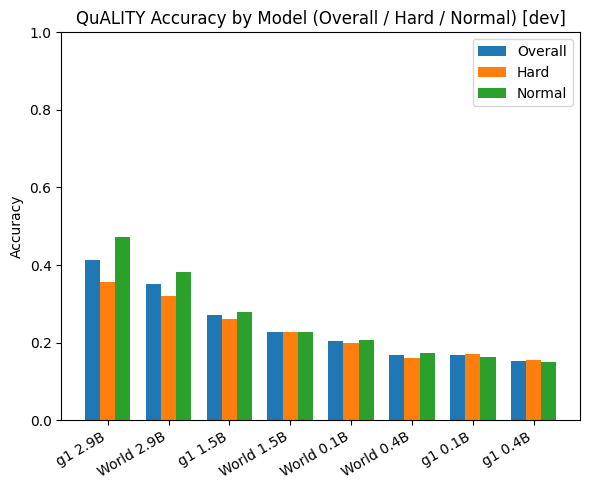

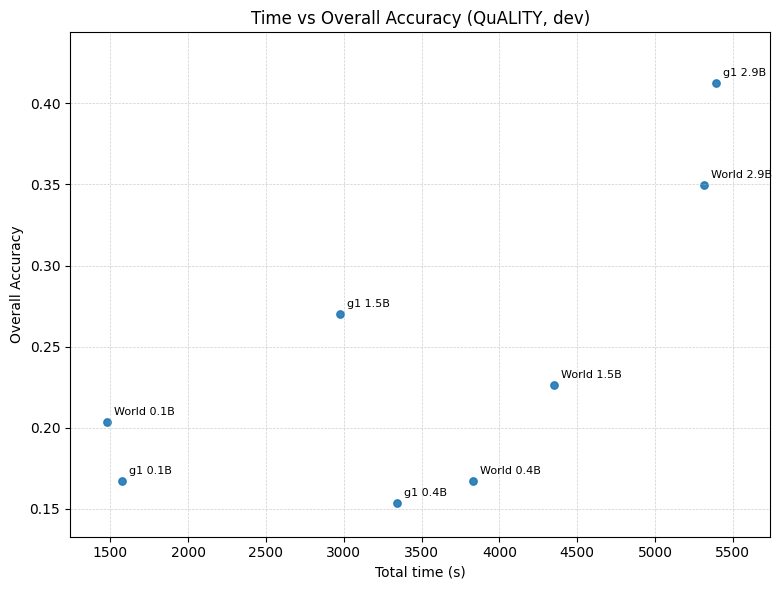

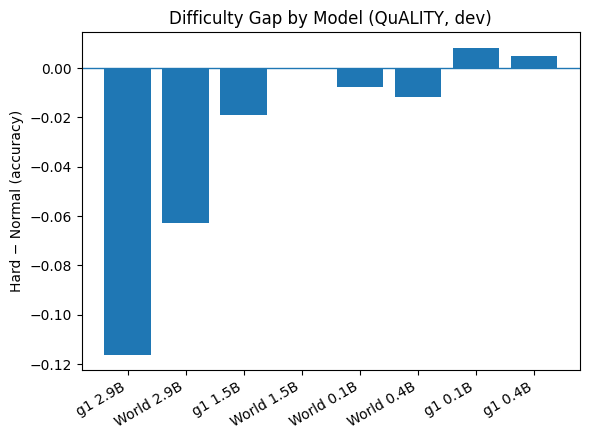

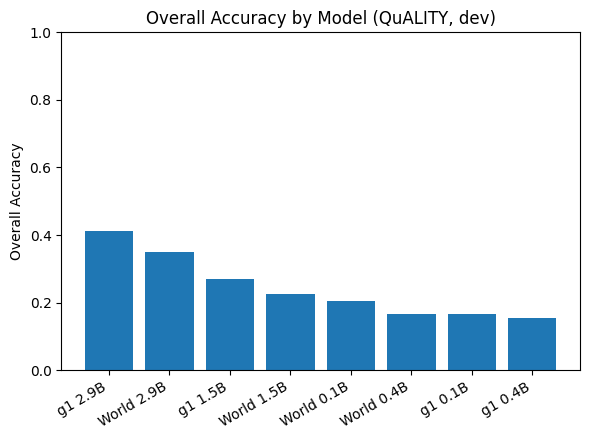

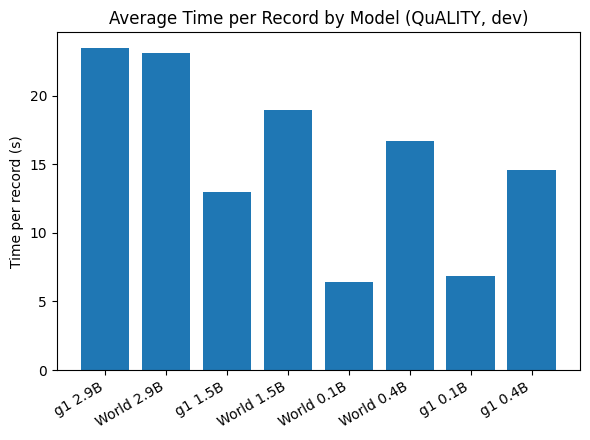

In [57]:
# -*- coding: utf-8 -*-
# Visualize QuALITY results (matplotlib only, one chart per figure, no custom colors)
# This version reads from QuALITY_<split>_summary_unified.json
# and writes figures into outputs_quality_unified/

import json
import math
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------------------
# Paths and basic configs
# -------------------------------------------------------------------

# Eval split name, consistent with your main script
EVAL_SPLIT = "dev"

# Root directory on your "local" (Google Drive)
BASE_DIR = Path("/content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV Dataset Test")

# Results directory for QuALITY
OUTPUTS_DIR = BASE_DIR / "outputs_quality_unified"

# Main summary file name, produced by your evaluation script
SUMMARY_FILENAME = f"QuALITY_{EVAL_SPLIT}_summary_unified.json"

JSON_PATH = OUTPUTS_DIR / SUMMARY_FILENAME
FIG_DIR = OUTPUTS_DIR  # save figures here as well


# -------------------------------------------------------------------
# IO helpers
# -------------------------------------------------------------------

def load_results(json_path: Path):
    """Load results from the QuALITY summary json produced by your script."""
    if not json_path.exists():
        raise FileNotFoundError(f"File not found: {json_path}")
    with json_path.open("r", encoding="utf-8") as f:
        data = json.load(f)
    if not isinstance(data, dict):
        raise ValueError("Expected a dict mapping model_name -> metrics dict.")
    return data


def to_rows(results_dict):
    """Convert dict to list of row dicts with safe defaults for QuALITY."""
    rows = []
    for model, metrics in results_dict.items():
        rows.append({
            "model": str(model),
            "total_time": float(metrics.get("Total time", float("nan"))),
            "overall": float(metrics.get("Overall Accuracy", float("nan"))),
            "hard": float(metrics.get("Hard Accuracy", float("nan"))),
            "normal": float(metrics.get("Normal Accuracy", float("nan"))),
            "num_records": float(metrics.get("Num records", float("nan"))),
        })
    return rows


def sort_rows(rows, key="overall", reverse=True):
    """Sort rows by a metric; NaNs go to the end."""
    valid = [r for r in rows if not math.isnan(r.get(key, float("nan")))]
    invalid = [r for r in rows if math.isnan(r.get(key, float("nan")))]
    valid_sorted = sorted(valid, key=lambda r: r[key], reverse=reverse)
    return valid_sorted + invalid


def ensure_outdir(path: Path):
    """Make sure the directory exists."""
    path.mkdir(parents=True, exist_ok=True)


# -------------------------------------------------------------------
# Plot helpers
# -------------------------------------------------------------------

def grouped_bar_accuracy(rows, outpath: Path):
    """Grouped bar chart: Overall / Hard / Normal accuracy per model."""
    models = [r["model"] for r in rows]
    overall = [r["overall"] for r in rows]
    hard = [r["hard"] for r in rows]
    normal = [r["normal"] for r in rows]

    x = range(len(models))
    width = 0.25

    plt.figure(figsize=(max(6, len(models) * 0.75), 5))
    plt.bar([i - width for i in x], overall, width, label="Overall")
    plt.bar(x, hard, width, label="Hard")
    plt.bar([i + width for i in x], normal, width, label="Normal")

    plt.xticks(list(x), models, rotation=30, ha="right")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.title(f"QuALITY Accuracy by Model (Overall / Hard / Normal) [{EVAL_SPLIT}]")
    plt.legend()
    plt.tight_layout()
    plt.savefig(outpath, dpi=200)
    plt.show()
    plt.close()


def scatter_time_vs_accuracy(rows, outpath: Path, top_k: int = 6):
    """Scatter: Total time (s) vs Overall accuracy.
    - Labels only top-K by accuracy + 4 extremes (min/max time, min/max accuracy).
    """
    xs, ys, labels = [], [], []
    for r in rows:
        if not math.isnan(r["total_time"]) and not math.isnan(r["overall"]):
            xs.append(r["total_time"])
            ys.append(r["overall"])
            labels.append(r["model"])

    if len(xs) == 0:
        raise ValueError("No valid points to plot.")

    plt.figure(figsize=(8, 6))
    plt.scatter(xs, ys, s=28, alpha=0.9)

    xs_np = np.array(xs)
    ys_np = np.array(ys)

    # extreme indices
    idx_min_time = int(np.argmin(xs_np))
    idx_max_time = int(np.argmax(xs_np))
    idx_min_acc = int(np.argmin(ys_np))
    idx_max_acc = int(np.argmax(ys_np))
    extreme_idx = {idx_min_time, idx_max_time, idx_min_acc, idx_max_acc}

    # top-K by accuracy
    k = min(top_k, len(ys_np))
    topk_idx = set(np.argsort(ys_np)[-k:].tolist())

    keep_idx = extreme_idx | topk_idx

    for i in sorted(keep_idx):
        plt.annotate(labels[i], (xs[i], ys[i]),
                     xytext=(5, 5),
                     textcoords="offset points",
                     fontsize=8)

    x_pad = (max(xs) - min(xs)) * 0.06 if max(xs) > min(xs) else 1.0
    y_pad = (max(ys) - min(ys)) * 0.08 if max(ys) > min(ys) else 0.05
    plt.xlim(min(xs) - x_pad, max(xs) + x_pad * 1.5)
    plt.ylim(min(ys) - y_pad, max(ys) + y_pad * 1.5)
    plt.margins(x=0.02, y=0.05)

    plt.xlabel("Total time (s)")
    plt.ylabel("Overall Accuracy")
    plt.title(f"Time vs Overall Accuracy (QuALITY, {EVAL_SPLIT})")
    plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
    plt.tight_layout()
    plt.savefig(outpath, dpi=200)
    plt.show()
    plt.close()


def bar_difficulty_gap(rows, outpath: Path):
    """Bar: (Hard - Normal) accuracy per model."""
    models = [r["model"] for r in rows]
    gaps = []
    for r in rows:
        h, n = r["hard"], r["normal"]
        gaps.append(float("nan") if (math.isnan(h) or math.isnan(n)) else (h - n))

    x = range(len(models))
    plt.figure(figsize=(max(6, len(models) * 0.7), 4.5))
    plt.bar(x, gaps)
    plt.axhline(0, linewidth=1)

    plt.xticks(list(x), models, rotation=30, ha="right")
    plt.ylabel("Hard − Normal (accuracy)")
    plt.title(f"Difficulty Gap by Model (QuALITY, {EVAL_SPLIT})")
    plt.tight_layout()
    plt.savefig(outpath, dpi=200)
    plt.show()
    plt.close()


def bar_overall_accuracy(rows, outpath: Path):
    """Simple bar chart of overall accuracy (sorted by overall)."""
    models = [r["model"] for r in rows]
    overall = [r["overall"] for r in rows]

    x = range(len(models))
    plt.figure(figsize=(max(6, len(models) * 0.7), 4.5))
    plt.bar(x, overall)

    plt.xticks(list(x), models, rotation=30, ha="right")
    plt.ylabel("Overall Accuracy")
    plt.ylim(0, 1)
    plt.title(f"Overall Accuracy by Model (QuALITY, {EVAL_SPLIT})")
    plt.tight_layout()
    plt.savefig(outpath, dpi=200)
    plt.show()
    plt.close()


def bar_time_per_record(rows, outpath: Path):
    """Bar chart: average time per record (Total time / Num records)."""
    models = [r["model"] for r in rows]
    tpr = []
    for r in rows:
        tt = r["total_time"]
        n = r["num_records"]
        if math.isnan(tt) or math.isnan(n) or n <= 0:
            tpr.append(float("nan"))
        else:
            tpr.append(tt / n)

    x = range(len(models))
    plt.figure(figsize=(max(6, len(models) * 0.7), 4.5))
    plt.bar(x, tpr)

    plt.xticks(list(x), models, rotation=30, ha="right")
    plt.ylabel("Time per record (s)")
    plt.title(f"Average Time per Record by Model (QuALITY, {EVAL_SPLIT})")
    plt.tight_layout()
    plt.savefig(outpath, dpi=200)
    plt.show()
    plt.close()


# -------------------------------------------------------------------
# Main
# -------------------------------------------------------------------

def main():
    ensure_outdir(OUTPUTS_DIR)
    results = load_results(JSON_PATH)
    rows = to_rows(results)

    # sort by overall accuracy (descending)
    rows_sorted = sort_rows(rows, key="overall", reverse=True)

    # 01: grouped accuracy (Overall / Hard / Normal)
    grouped_bar_accuracy(
        rows_sorted,
        FIG_DIR / f"QuALITY_{EVAL_SPLIT}_01_grouped_accuracy.png"
    )

    # 02: time vs overall accuracy (scatter)
    scatter_time_vs_accuracy(
        rows_sorted,
        FIG_DIR / f"QuALITY_{EVAL_SPLIT}_02_time_vs_overall.png",
        top_k=len(rows_sorted)
    )

    # 03: difficulty gap (Hard - Normal)
    bar_difficulty_gap(
        rows_sorted,
        FIG_DIR / f"QuALITY_{EVAL_SPLIT}_03_hard_normal_gap.png"
    )

    # 04: sorted overall accuracy bar chart
    bar_overall_accuracy(
        rows_sorted,
        FIG_DIR / f"QuALITY_{EVAL_SPLIT}_04_overall_bar.png"
    )

    # 05: average time per record bar chart
    bar_time_per_record(
        rows_sorted,
        FIG_DIR / f"QuALITY_{EVAL_SPLIT}_05_time_per_record.png"
    )


if __name__ == "__main__":
    main()
